## 3. Análise Exploratória dos Dados

Neste notebook realizamos uma Análise Exploratória dos Dados do conjunto do ENEM, investigando principalmente características das questões, alternativas e parâmetros de dificuldade. 

A análise inclui a distribuição de questões por ano, a investigação detalhada do parâmetro B (dificuldade), incluindo sua distribuição, normalidade e relação com outras variáveis. Além disso, são explorados os enunciados, gabaritos e distratores, utilizando visualizações como histogramas, gráficos de dispersão, boxplots e nuvens de palavras para identificar padrões e insights relevantes.

In [145]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib.ticker import MultipleLocator


# Estatística
import scipy.stats as stats

# Processamento de texto
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gustavo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Carregando dados limpos (resultado da Pré-Tokenização)

data_folder = "../data/final/cleaned_data.csv"

df_enem = pd.read_csv(data_folder)
df_enem.head()

,numero_questao,gabarito,NU_PARAM_A,nu_param_B,NU_PARAM_C,ANO,enunciado,alternativas,gabarito_texto,distratores,enunciado_limpo,alternativas_limpo,gabarito_texto_limpo,distratores_limpo
0,1,C,3.43894,0.97831,0.10855,2017,"No império africano do Mali, no século XIV, To...",A: isolamento geográﬁco do Saara ocidental; B...,posição relativa nas redes de circulação,isolamento geográﬁco do Saara ocidental; explo...,africano além astronomia centro cidade comérci...,A: isolamento ocidental saara; B: exploração i...,circulação posição redes relativa,competição econômica exploração intensiva isol...
1,2,D,3.00837,0.49169,0.13877,2017,Após a Declaração Universal dos Direitos Human...,A: ataque feito pelos japoneses à base milita...,execução de judeus e eslavos presos em guetos ...,ataque feito pelos japoneses à base militar am...,aberrações acontecimentos após assumida branco...,A: americana ataque base feito harbor japonese...,campos concentração eslavos execução guetos ju...,americana americanas ataque atômicas base bomb...
2,3,D,0.60432,3.25992,0.08798,2017,"A moralidade, Bentham exortava, não é uma ques...",A: fundamentação cientíﬁca de viés positivist...,racionalidade de caráter pragmático,fundamentação cientíﬁca de viés positivista; c...,abstratas afetados agradar ação bentham condut...,A: fundamentação positivista viés; B: convençã...,caráter pragmático racionalidade,comportamental convenção fundamentação inclina...
3,4,E,1.85031,0.57925,0.11344,2017,Fala-se muito nos dias de hoje em direitos do ...,A: modernização da educação escolar; B: atuali...,universalização do princípio da igualdade civil,modernização da educação escolar; atualização ...,apresenta assembleia bases bem cidadão concepç...,A: educação escolar modernização; B: atualizaç...,civil igualdade princípio universalização,aristocráticos atualização conhecimento costum...
4,5,C,2.46290,0.76307,0.17672,2017,Na Constituição da República Federativa do Bra...,A: etnia e miscigenação racial; B: sociedade...,espaço e sobrevivência cultural,etnia e miscigenação racial; sociedade e igual...,aplicação artigo bens brasil competindo consta...,A: etnia miscigenação racial; B: igualdade jur...,cultural espaço sobrevivência,ambiental bem econômica educação etnia igualda...


In [ ]:
# Renomeando parâmetro relacionado a dificuldade

df = df_enem.rename(columns={"nu_param_B": "dificuldade"})
df.head()

,numero_questao,gabarito,NU_PARAM_A,dificuldade,NU_PARAM_C,ANO,enunciado,alternativas,gabarito_texto,distratores,enunciado_limpo,alternativas_limpo,gabarito_texto_limpo,distratores_limpo
0,1,C,3.43894,0.97831,0.10855,2017,"No império africano do Mali, no século XIV, To...",A: isolamento geográﬁco do Saara ocidental; B...,posição relativa nas redes de circulação,isolamento geográﬁco do Saara ocidental; explo...,africano além astronomia centro cidade comérci...,A: isolamento ocidental saara; B: exploração i...,circulação posição redes relativa,competição econômica exploração intensiva isol...
1,2,D,3.00837,0.49169,0.13877,2017,Após a Declaração Universal dos Direitos Human...,A: ataque feito pelos japoneses à base milita...,execução de judeus e eslavos presos em guetos ...,ataque feito pelos japoneses à base militar am...,aberrações acontecimentos após assumida branco...,A: americana ataque base feito harbor japonese...,campos concentração eslavos execução guetos ju...,americana americanas ataque atômicas base bomb...
2,3,D,0.60432,3.25992,0.08798,2017,"A moralidade, Bentham exortava, não é uma ques...",A: fundamentação cientíﬁca de viés positivist...,racionalidade de caráter pragmático,fundamentação cientíﬁca de viés positivista; c...,abstratas afetados agradar ação bentham condut...,A: fundamentação positivista viés; B: convençã...,caráter pragmático racionalidade,comportamental convenção fundamentação inclina...
3,4,E,1.85031,0.57925,0.11344,2017,Fala-se muito nos dias de hoje em direitos do ...,A: modernização da educação escolar; B: atuali...,universalização do princípio da igualdade civil,modernização da educação escolar; atualização ...,apresenta assembleia bases bem cidadão concepç...,A: educação escolar modernização; B: atualizaç...,civil igualdade princípio universalização,aristocráticos atualização conhecimento costum...
4,5,C,2.46290,0.76307,0.17672,2017,Na Constituição da República Federativa do Bra...,A: etnia e miscigenação racial; B: sociedade...,espaço e sobrevivência cultural,etnia e miscigenação racial; sociedade e igual...,aplicação artigo bens brasil competindo consta...,A: etnia miscigenação racial; B: igualdade jur...,cultural espaço sobrevivência,ambiental bem econômica educação etnia igualda...


---
## 3.1 Funções Utilizadas

In [148]:
# =====================================================
#                FUNÇÕES DE ESTATÍSTICA
# =====================================================

def max_sem_outlier(series: pd.Series) -> float:
    """
    Retorna o valor máximo de uma série numérica, ignorando outliers superiores
    segundo o critério IQR (1.5 × IQR acima do Q3).

    Parâmetros:
    - series: pd.Series numérica

    Retorna:
    - float: valor máximo sem considerar outliers superiores
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    limite = q3 + 1.5 * iqr
    return series[series <= limite].max()

# =====================================================
#             FUNÇÕES DE LIMPEZA DE TEXTO
# =====================================================

def clean_text(text: str) -> str:
    """
    Normaliza e limpa um texto:
    - Converte para minúsculas
    - Extrai apenas palavras alfabéticas
    - Remove stopwords em Português
    - Remove duplicatas e ordena lexicograficamente

    Parâmetros:
    - text: string a ser limpa

    Retorna:
    - str: texto limpo
    """
    if not isinstance(text, str):
        return ""
    tokens = re.findall(r"\b[a-zA-Zà-úÀ-ÚüÜ]+\b", text.lower())
    filtered = [w for w in tokens if w not in stop_words]
    unique_sorted = sorted(set(filtered))
    return " ".join(unique_sorted)


def clean_alternatives(alt_text: str) -> str:
    """
    Processa alternativas de múltipla escolha mantendo rótulos (A:, B:, etc.)
    e limpando cada enunciado via `clean_text`.

    Parâmetros:
    - alt_text: string com alternativas (e.g. "A: texto; B: outro texto")

    Retorna:
    - str: alternativas limpas, separadas por ponto-e-vírgula
    """
    if not isinstance(alt_text, str):
        return ""
    parts = re.split(r'(?=[A-E]: )', alt_text)
    cleaned = []
    for part in parts:
        if ": " in part:
            label, content = part.split(": ", 1)
            cleaned_text = clean_text(content)
            cleaned.append(f"{label}: {cleaned_text}")
    return "; ".join(cleaned)

# =====================================================
#                FUNÇÕES DE VISUALIZAÇÃO
# =====================================================

def get_wordcloud(df: pd.DataFrame, col: str, max_words: int = 100) -> None:
    """
    Gera nuvens de palavras separadas por nível de dificuldade:
    - Todos os textos
    - Textos com dificuldade > mediana
    - Textos com dificuldade ≤ mediana

    Parâmetros:
    - df: DataFrame com colunas `{col}` e 'dificuldade'
    - col: nome da coluna de texto
    - max_words: quantidade máxima de palavras na nuvem
    """
    data = df.dropna(subset=[col]).copy()
    med = data['dificuldade'].median()
    groups = {
        'Todos': ' '.join(data[col]),
        f'> {med:.2f}': ' '.join(data[data['dificuldade'] > med][col]),
        f'≤ {med:.2f}': ' '.join(data[data['dificuldade'] <= med][col])
    }

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, (label, text) in zip(axes, groups.items()):
        wc = WordCloud(width=600, height=300, background_color='white', max_words=max_words)
        ax.imshow(wc.generate(text), interpolation='bilinear')
        ax.set_title(f'{label}', fontsize=12)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


def get_word_frequencies(df: pd.DataFrame, col: str, top_n: int = 10) -> None:
    """
    Plota histogramas horizontais das `top_n` palavras mais frequentes,
    separadas por nível de dificuldade.

    Parâmetros:
    - df: DataFrame com colunas `{col}` e 'dificuldade'
    - col: nome da coluna de texto
    - top_n: número de palavras a exibir
    """
    data = df.dropna(subset=[col]).copy()
    med = data['dificuldade'].median()
    subsets = {
        'Todos': data[col],
        f'> {med:.2f}': data[data['dificuldade'] > med][col],
        f'≤ {med:.2f}': data[data['dificuldade'] <= med][col]
    }

    def top_words(series):
        vec = CountVectorizer()
        X = vec.fit_transform(series)
        counts = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out()).sum()
        return counts.nlargest(top_n)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    colors = ['skyblue', 'salmon', 'lightgreen']
    for ax, ((label, texts), color) in zip(axes, zip(subsets.items(), colors)):
        top = top_words(texts)
        ax.barh(top.index[::-1], top.values[::-1], color=color)
        ax.set_title(label)
        ax.set_xlabel('Frequência')
        ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()


def plot_scatter(
    df: pd.DataFrame,
    coluna_original: str,
    coluna_limpa: str,
    coluna_dificuldade: str,
    figsize: tuple = (14, 5),
    alpha: float = 1.0,
    s: int = 40
) -> None:
    """
    Plota scatterplots do tamanho (nº de caracteres) vs dificuldade,
    comparando texto original e texto limpo.

    Parâmetros:
    - df: DataFrame com colunas de texto e 'dificuldade'
    - coluna_original: coluna com texto original
    - coluna_limpa: coluna com texto pré-processado
    - coluna_dificuldade: coluna com valores de dificuldade
    - figsize: tamanho da figura
    - alpha: transparência dos pontos
    - s: tamanho dos marcadores
    """
    len_orig = df[coluna_original].str.len()
    len_lim = df[coluna_limpa].str.len()
    diff = df[coluna_dificuldade]

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    sns.scatterplot(x=len_orig, y=diff, ax=axes[0], color='blue', alpha=alpha, s=s)
    axes[0].set_title('Original vs Dificuldade')
    sns.scatterplot(x=len_lim, y=diff, ax=axes[1], color='orange', alpha=alpha, s=s)
    axes[1].set_title('Limpo vs Dificuldade')

    x_min, x_max = len_lim.min(), len_orig.max()
    for ax in axes:
        ax.set_xlim(x_min, x_max)

    plt.tight_layout()
    plt.show()


def plot_distribuicao(
    df: pd.DataFrame,
    coluna_original: str,
    coluna_limpa: str,
    bins: int = 30,
    figsize: tuple = (10, 6)
) -> None:
    """
    Plota histogramas sobrepostos da distribuição de tamanho dos gabaritos:
    original vs pré-processado.

    Parâmetros:
    - df: DataFrame com colunas de texto
    - coluna_original: coluna com gabarito original
    - coluna_limpa: coluna com gabarito limpo
    - bins: número de bins
    - figsize: tamanho da figura
    """
    orig = df[coluna_original].str.len()
    limpo = df[coluna_limpa].str.len()

    plt.figure(figsize=figsize)
    sns.histplot(orig, bins=bins, kde=True, color='blue', alpha=0.5, label='Original')
    sns.histplot(limpo, bins=bins, kde=True, color='orange', alpha=0.5, label='Limpo')

    plt.title('Distribuição de Tamanho dos Gabaritos')
    plt.xlabel('Número de Caracteres')
    plt.ylabel('Frequência')
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_questoes_por_ano(
    df: pd.DataFrame,
    coluna_ano: str = 'ANO',
    limite_superior: int = 45,
    figsize: tuple = (10, 6)
) -> None:
    """
    Exibe gráfico de barras com contagem de questões por ano e linha de limite.

    Parâmetros:
    - df: DataFrame com coluna de ano
    - coluna_ano: nome da coluna de ano
    - limite_superior: valor para linha de corte
    - figsize: tamanho da figura
    """
    counts = df[coluna_ano].value_counts().sort_index()

    fig, ax = plt.subplots(figsize=figsize)
    bars = ax.bar(counts.index, counts.values, color='skyblue')

    # Anotações sobre as barras
    for bar in bars:
        h = bar.get_height()
        ax.annotate(f'{h}',
                    xy=(bar.get_x() + bar.get_width() / 2, h),
                    xytext=(0, 5), textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

    # Linha de limite
    ax.axhline(y=limite_superior, color='red', linestyle='--', linewidth=2)

    ax.set_title('Número de Questões por Ano')
    ax.set_xlabel('Ano')
    ax.set_ylabel('Contagem')
    ax.set_xticks(counts.index)
    ax.set_xticklabels(counts.index, rotation=45)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_ylim(counts.values.min() - 5, limite_superior + 5)
    ax.yaxis.set_major_locator(MultipleLocator(2))

    plt.tight_layout()
    plt.show()


---
## 3.2 Análise Preliminar

Dado que `nu_param_B` (aka. `dificuldade`, por aqui) é a variável target, desnecessário focar em questões em que esta não foi calculada

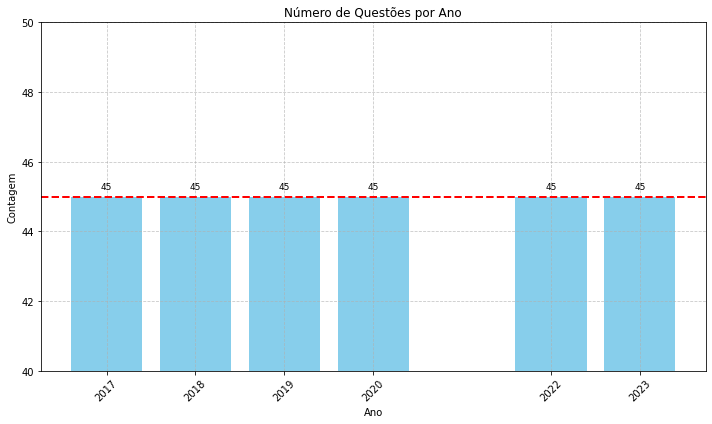

In [149]:
plot_questoes_por_ano(df)

In [150]:
# verificando existência de valores nulos

df.isna().sum()

numero_questao          0
gabarito                0
NU_PARAM_A              3
dificuldade             3
NU_PARAM_C              3
ANO                     0
enunciado               0
alternativas            0
gabarito_texto          0
distratores             0
enunciado_limpo         0
alternativas_limpo      0
gabarito_texto_limpo    1
distratores_limpo       0
dtype: int64

In [151]:
# removendo valores nulos

df = df[df['dificuldade'].notna()]

In [152]:
# breve visualização das medidas numéricas

df.describe()

,numero_questao,NU_PARAM_A,dificuldade,NU_PARAM_C,ANO
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,60.307116,2.370353,1.108998,0.159306,2019.831461
std,21.289167,1.075149,0.710402,0.068549,2.125230
min,1.000000,0.473870,-0.726450,0.001610,2017.000000
25%,50.000000,1.578375,0.625505,0.117760,2018.000000
50%,63.000000,2.201330,1.059680,0.166650,2020.000000
75%,77.000000,3.042760,1.571840,0.201005,2022.000000
max,90.000000,6.694280,3.517780,0.351600,2023.000000


---
## 3.3 Análise da Dificuldade

Text(0, 0.5, 'Frequência')

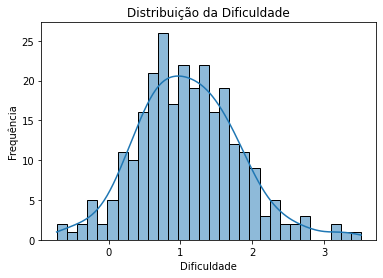

In [153]:
# histograma da dificuldade

sns.histplot(df['dificuldade'], bins=30, kde=True)
plt.title('Distribuição da Dificuldade')
plt.xlabel('Dificuldade')
plt.ylabel('Frequência')

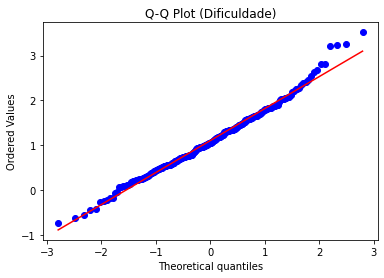

In [154]:
# q-q plot da dificuldade

stats.probplot(df['dificuldade'], dist="norm", plot=plt)
plt.title('Q-Q Plot (Dificuldade)')
plt.show()

In [155]:
# verificando se a dificuldade segue uma distribuição normal

stat, p = stats.shapiro(df[df['dificuldade'].notna()]['dificuldade'])
print(f"Estatística de teste: {stat:.4f} | p-valor: {p:.4f}")

if p > 0.05:
    print("Não rejeita H_0: distribuição normal.")
else:
    print("Rejeita H_0: exclui distribuição normal.")


Estatística de teste: 0.9890 | p-valor: 0.0409
Rejeita H_0: exclui distribuição normal.


Com a exclusão da distribuição normal, necessário o grupo se atentar se o modelo de predição possui sensibilidade à distribuição. 

Caso seja, possível aplicar Box-Cox.

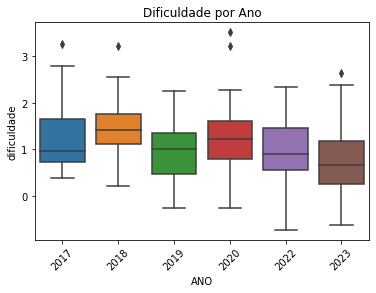

In [156]:
# boxplot da dificuldade por ano

sns.boxplot(x='ANO', y='dificuldade', data=df, order=sorted(df["ANO"].unique()))
plt.title('Dificuldade por Ano')
plt.xticks(rotation=45)

plt.show()

In [157]:
# valores máximos das dificuldades por ano

max_por_ano = df.groupby('ANO')['dificuldade'].apply(max_sem_outlier)
max_por_ano

ANO
2017    2.80277
2018    2.55364
2019    2.25728
2020    2.28546
2022    2.33974
2023    2.37904
Name: dificuldade, dtype: float64

O corte de dificuldade 3, feito no artigo, não parece de todo arbitrário.

Afinal, na maioria dos anos, o máximo de dificuldade (excluídos os outliers) não ultrapassa 3 frequentemente. Como sugestão, possível utilizar o corte do máximo da lista (ano de 2013, com 3.38570)

---
## 3.4 Análise dos Enunciados

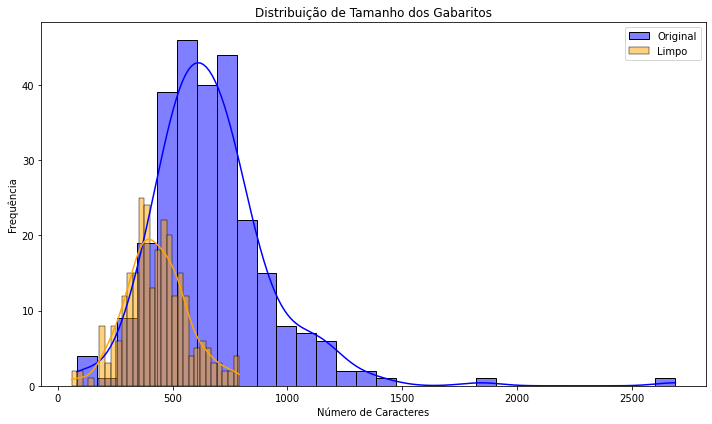

In [158]:
# visualizando o histograma da variável de enunciado pelo tamanho do mesmo 

plot_distribuicao(df, 'enunciado', 'enunciado_limpo')

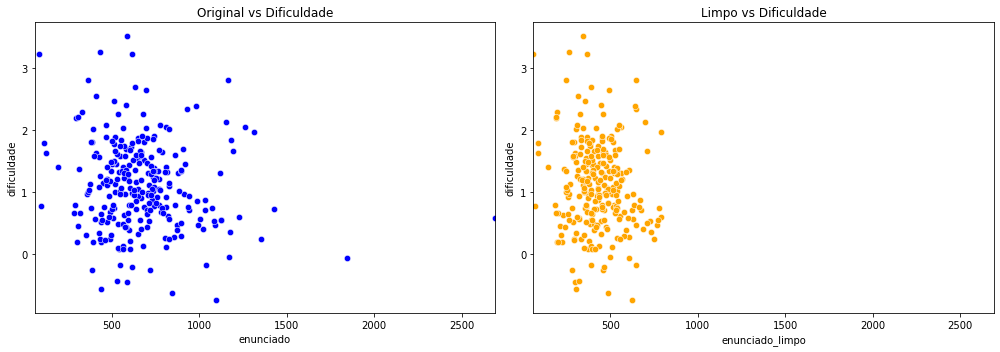

In [159]:
# scatterplot do tamanho do enunciado vs dificuldade

plot_scatter(df, 'enunciado', 'enunciado_limpo', 'dificuldade')

Não se verifica um correlação direta entre o tamanho do enunciado e a dificuldade da questão, muito embora se verifique uma pequena concentração entre 0 e 2 nos menores enunciados.

---
## 3.5. Análise das Alternativas

### 3.5.1. **Distribuição das Alternativas Corretas (Gabarito)**

<Axes: title={'center': 'Distribuição de Alternativas Corretas'}>

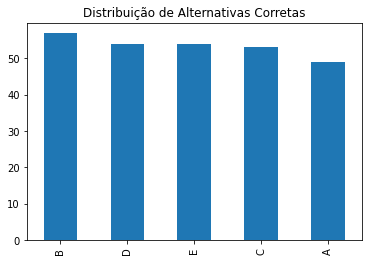

In [160]:
# frequência em que cada opção do gabarito foi correta

df['gabarito'].value_counts().plot(kind='bar', title='Distribuição de Alternativas Corretas')

### 3.5.2. **Distribuição do tamanho do Gabarito**

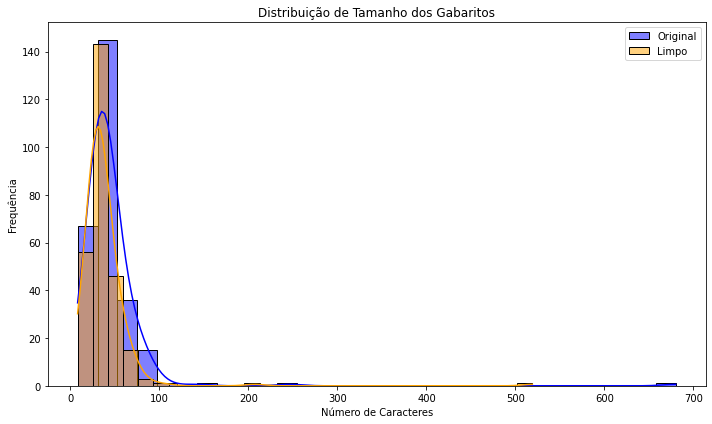

In [161]:
# distribuições dos tamanhos das alternativas possíveis

plot_distribuicao(df, 'gabarito_texto', 'gabarito_texto_limpo')

### 3.5.3. **Gráfico de Dispersão (Gabarito x Dificuldade)**

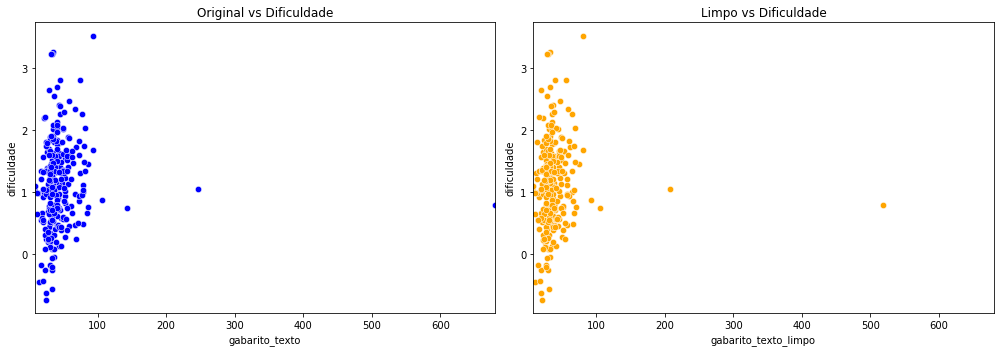

In [162]:
# gráfico de dispersão do Gabarito x Dificuldade

plot_scatter(df, 'gabarito_texto', 'gabarito_texto_limpo', 'dificuldade')

### 3.5.4. **Distribuição dos Distratores (Alternativas Incorretas)**

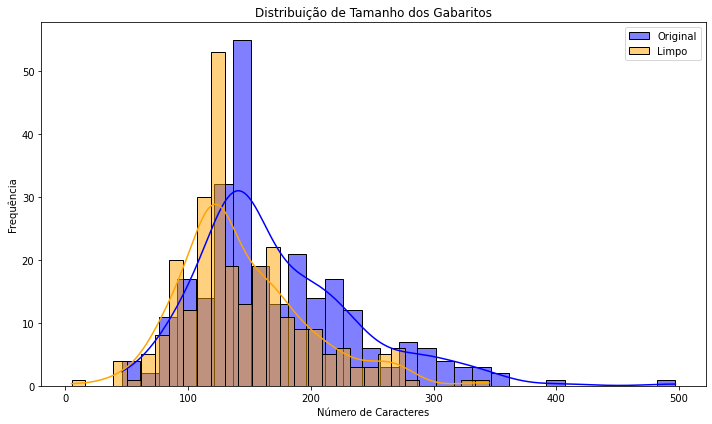

In [163]:
# distribuição dos distratores

plot_distribuicao(df, 'distratores', 'distratores_limpo')

### 3.5.5. Gráfico de Dispersão (Distratores x Dificuldade)


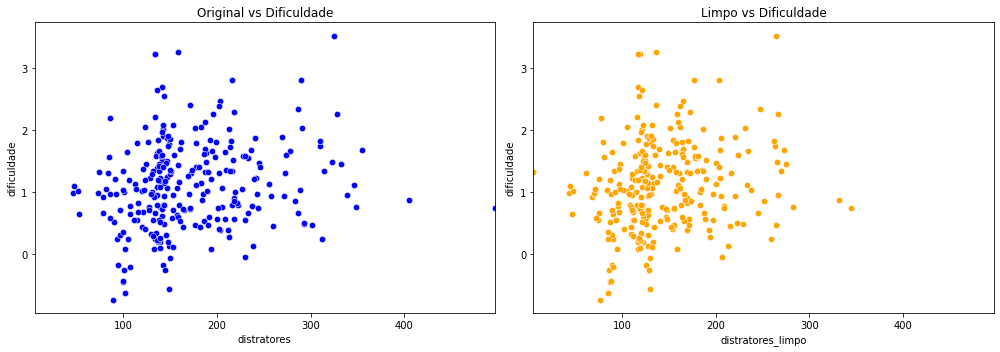

In [164]:
# grafico de dispersão dos distratores

plot_scatter(df, 'distratores', 'distratores_limpo', 'dificuldade')

---
## 3.6. WordCloud e Frequências (Enunciado, Gabarito e Distratores)

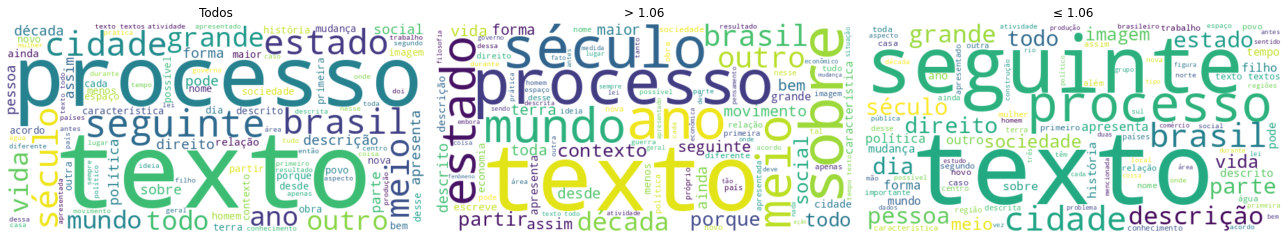

In [165]:
# Núvem de palavras dos enunciados (já limpos)

get_wordcloud(df, "enunciado_limpo")

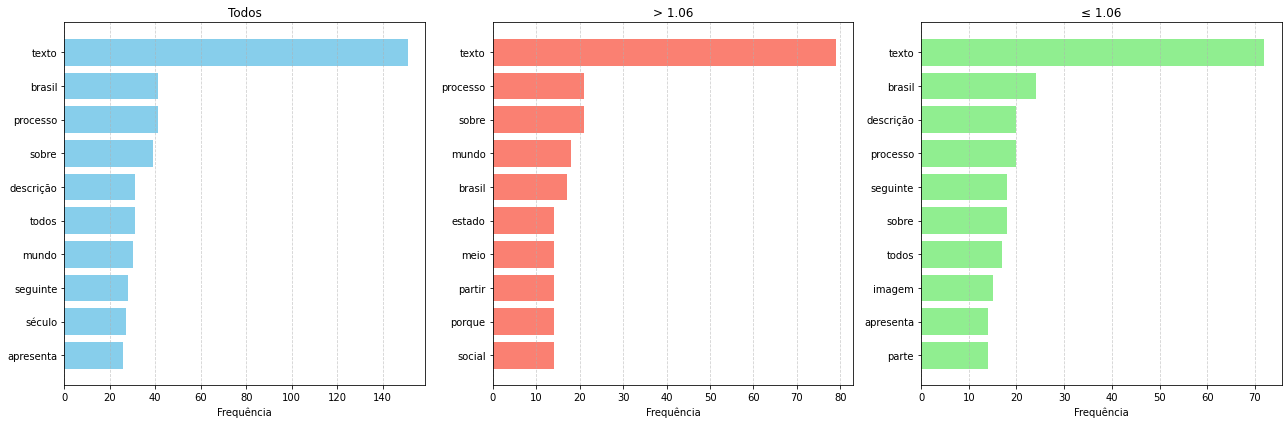

In [166]:
# histogramas de frequência dos enunciados (já limpos)

get_word_frequencies(df, "enunciado_limpo")

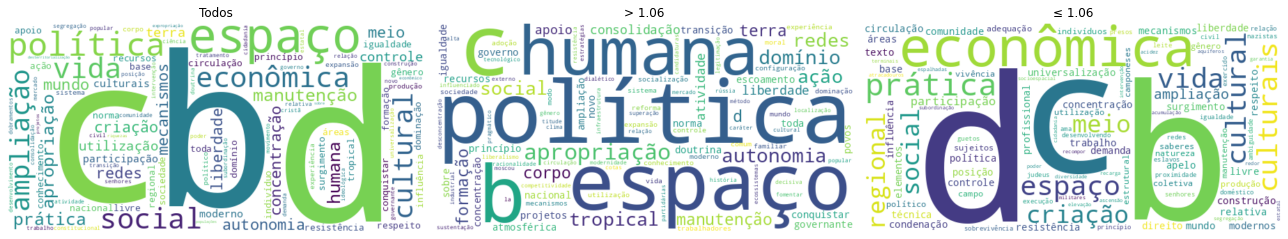

In [167]:
# Núvem de palavras dos gabaritos (já limpos)

df['gabarito_texto_adap'] = df['gabarito_texto_limpo'].dropna().str.replace(r'[A-E]:\s*', '', regex=True)

get_wordcloud(df, "gabarito_texto_adap")

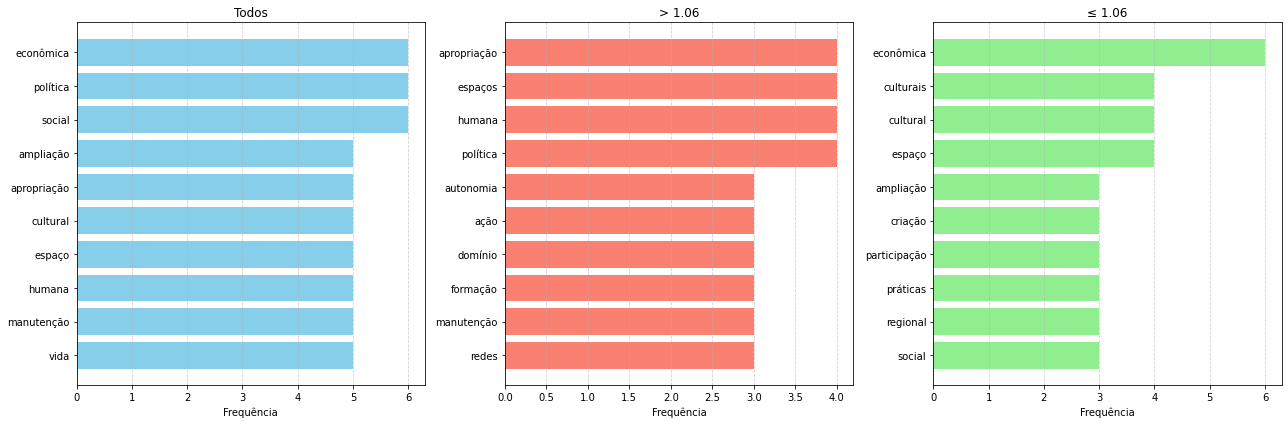

In [168]:
# histogramas de frequência dos gabaritos (já limpos)

get_word_frequencies(df, "gabarito_texto_adap")

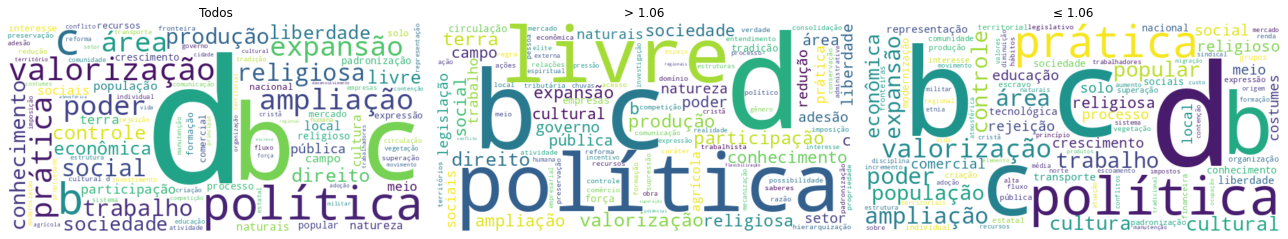

In [169]:
# Núvem de palavras dos distratores (já limpos)

df['distratores_adap'] = df['distratores_limpo'].dropna().str.replace(r'[A-E]:\s*', '', regex=True)

get_wordcloud(df, "distratores_adap")

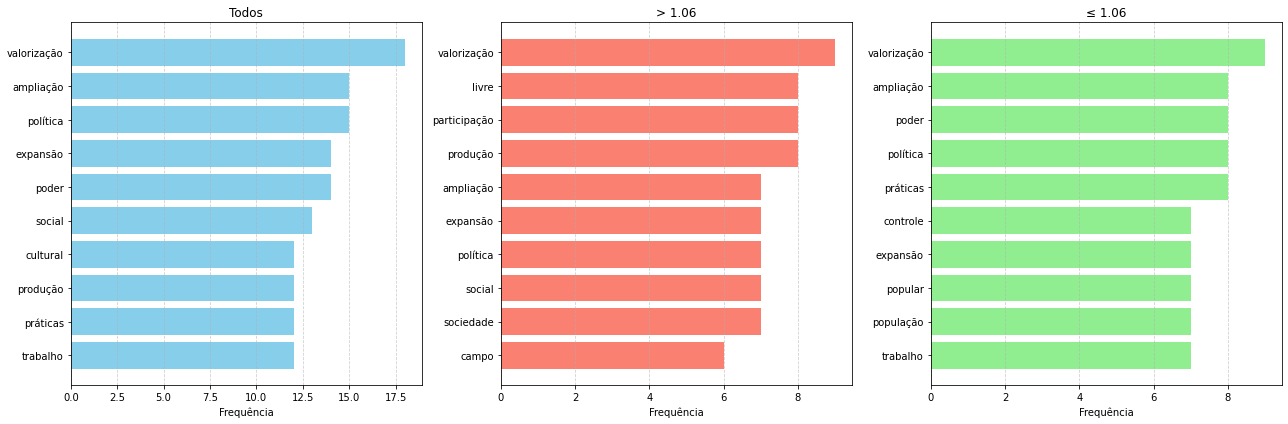

In [170]:
# histogramas de frequência dos distratores (já limpos)


get_word_frequencies(df, "distratores_adap")

---